**In case of problems or questions, please first check the list of [Frequently Asked Questions (FAQ)](https://stardist.net/docs/faq.html).**

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

In [1]:
# from __future__ import print_function, unicode_literals, absolute_import, division
# import sys
import numpy as np
# import matplotlib
# matplotlib.rcParams["image.interpolation"] = 'none'
# import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
# from csbdeep.io import save_tiff_imagej_compatible

# from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
# from stardist.models import StarDist2D

np.random.seed(6)
# lbl_cmap = random_label_cmap()

# Data

We assume that data has already been downloaded in via notebook [1_data.ipynb](1_data.ipynb).  
We now load images from the sub-folder `test` that have not been used during training.

In [2]:
#X = sorted(glob('data/dsb2018/test/images/*.tif'))
X = sorted(glob('/mnt/efs/aimbl_2025/student_data/S-LS/raw_bacteria/*.tif'))
X = list(map(imread,X))

n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

In [3]:
print(X[0].shape, X[0].dtype, type(X[0]))

(2208, 2752) uint16 <class 'numpy.ndarray'>


In [3]:
# show all test images
if False:
    fig, ax = plt.subplots(7,8, figsize=(16,16))
    for i,(a,x) in enumerate(zip(ax.flat, X)):
        a.imshow(x if x.ndim==2 else x[...,0], cmap='gray')
        a.set_title(i)
    [a.axis('off') for a in ax.flat]
    plt.tight_layout()
None;

# Load trained model

If you trained your own StarDist model (and optimized its thresholds) via notebook [2_training.ipynb](2_training.ipynb), then please set `demo_model = False` below.

In [4]:
demo_model = True

if demo_model:
    print (
        "NOTE: This is loading a previously trained demo model!\n"
        "      Please set the variable 'demo_model = False' to load your own trained model.",
        file=sys.stderr, flush=True
    )
    model = StarDist2D.from_pretrained('2D_demo')
else:
    model = StarDist2D(None, name='stardist', basedir='models')
None;

NOTE: This is loading a previously trained demo model!
      Please set the variable 'demo_model = False' to load your own trained model.


Found model '2D_demo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.486166, nms_thresh=0.5.


In [4]:
from stardist.models import StarDist2D

ON_Stardist_model= StarDist2D(None, "Stardist_training_model", "/home/S-LS/AI-MBL-2025/masketeers/")

bioimageio_utils.py (2): pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
2025-09-03 19:42:31.889594: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-03 19:42:31.998557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-03 19:42:34.554066: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly di

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## Prediction

Make sure to normalize the input image beforehand or supply a `normalizer` to the prediction function.

Calling `model.predict_instances` will
- predict object probabilities and star-convex polygon distances (see `model.predict` if you want those)
- perform non-maximum suppression (with overlap threshold `nms_thresh`) for polygons above object probability threshold `prob_thresh`.
- render all remaining polygon instances in a label image
- return the label instances image and also the details (coordinates, etc.) of all remaining polygons

In [15]:
img = normalize(X[18], 1,99.8, axis=axis_norm)
labels, details = ON_Stardist_model.predict_instances(img)

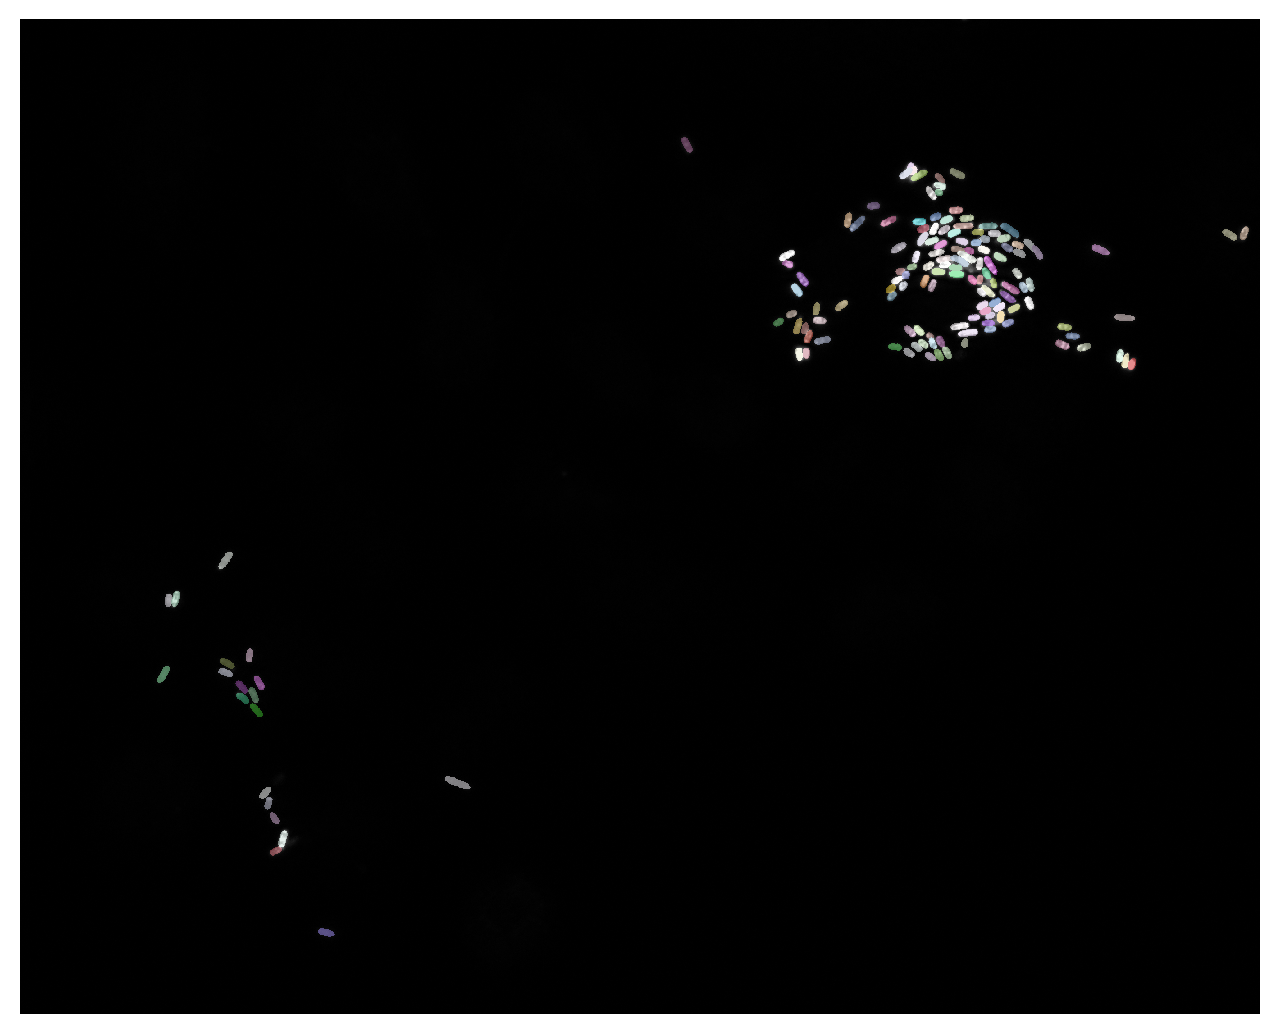

In [ ]:
#Image 18
plt.figure(figsize=(8,8))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

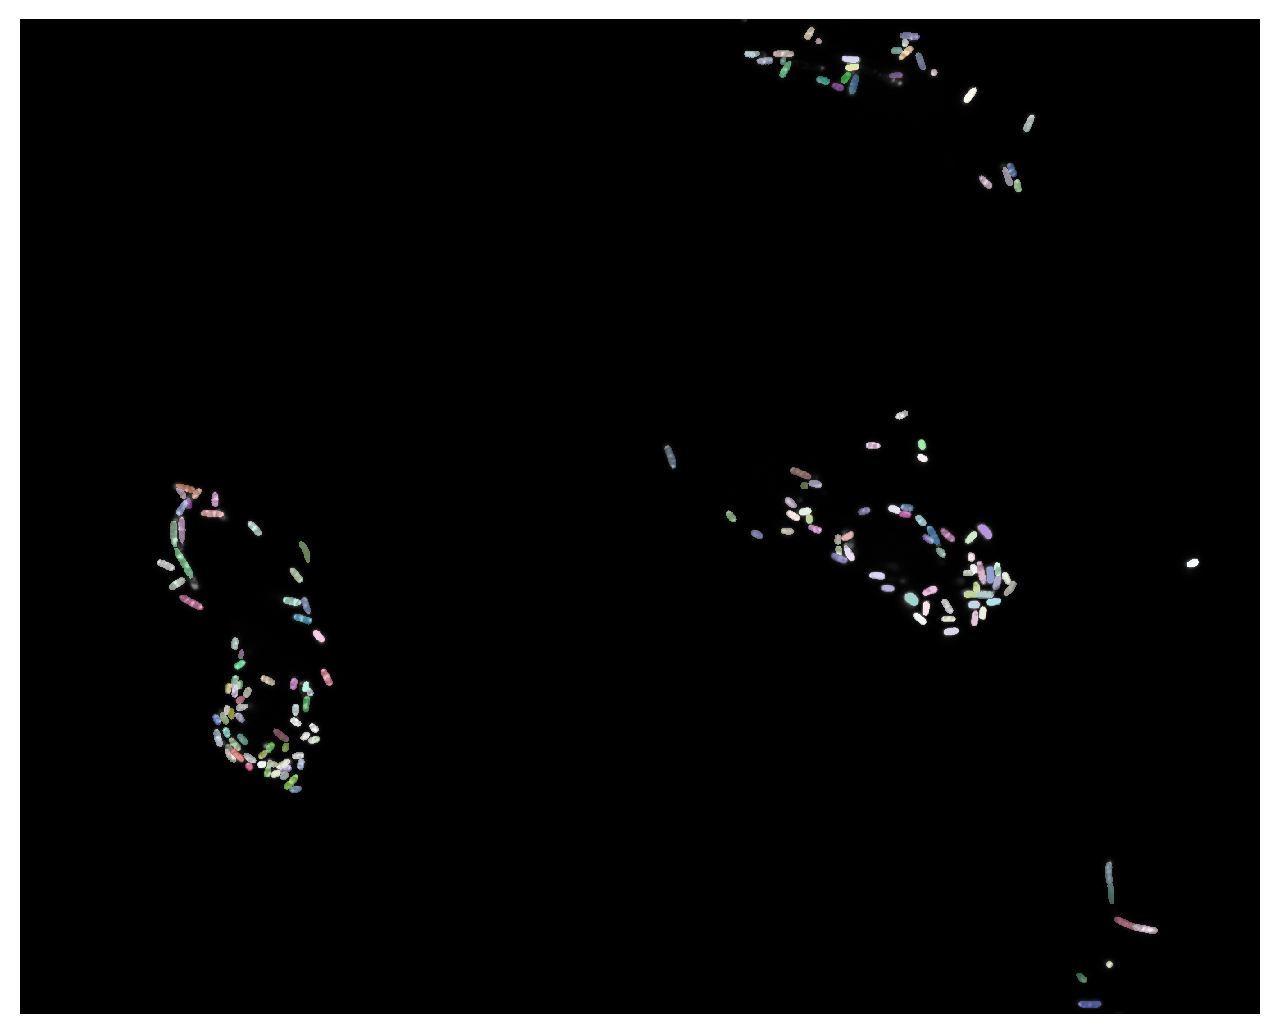

In [6]:
img_50 = normalize(X[50], 1,99.8, axis=axis_norm)
labels_50, details = ON_Stardist_model.predict_instances(img_50)


#Image 50
plt.figure(figsize=(8,8))
plt.imshow(img_50 if img_50.ndim==2 else img_50[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels_50, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

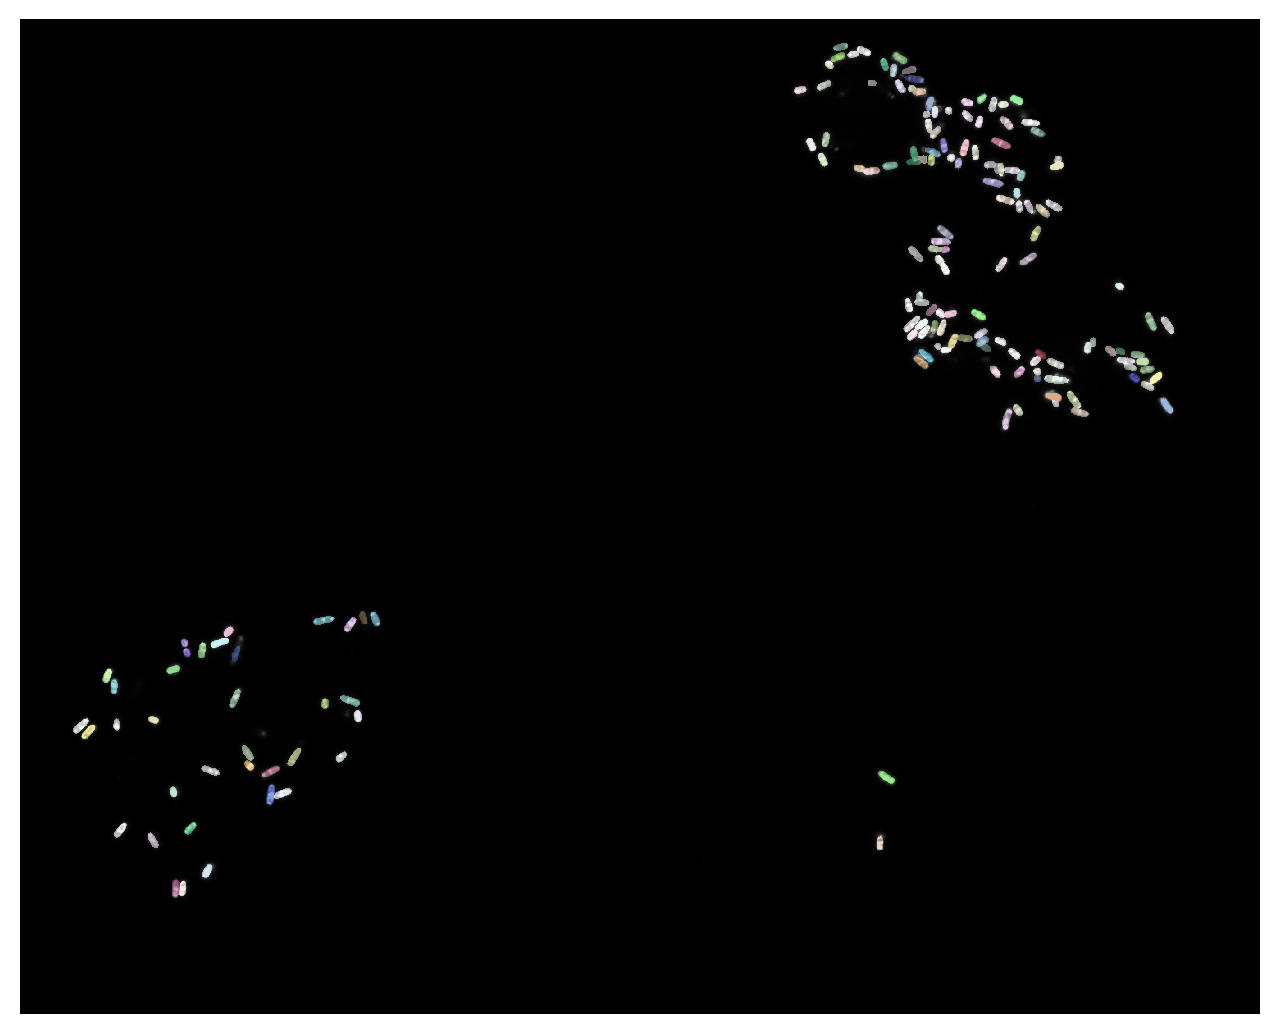

In [16]:
img_47 = normalize(X[47], 1,99.8, axis=axis_norm)
labels_47, details = ON_Stardist_model.predict_instances(img_47)


#Image 47
plt.figure(figsize=(8,8))
plt.imshow(img_47 if img_47.ndim==2 else img_47[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels_47, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

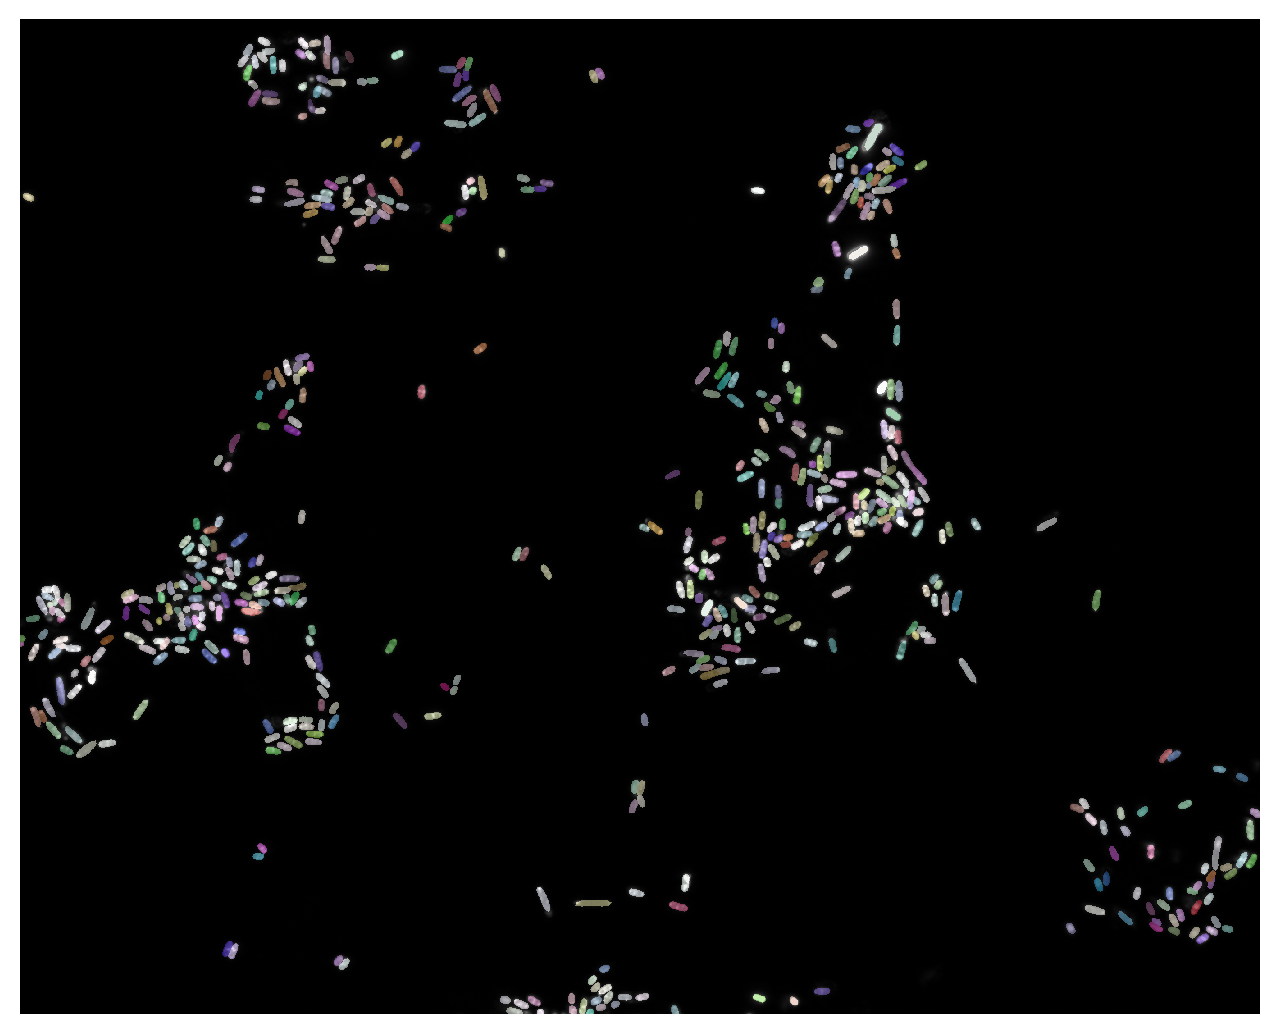

In [5]:
img_32 = normalize(X[32], 1,99.8, axis=axis_norm)
labels_32, details = ON_Stardist_model.predict_instances(img_32)


#Image 32
plt.figure(figsize=(8,8))
plt.imshow(img_32 if img_32.ndim==2 else img_32[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels_32, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

In [5]:
img = normalize(X[32], 1,99.8, axis=axis_norm)
label_32, details = ON_Stardist_model.predict_instances(img)

In [7]:
print(X[32].shape, X[32].dtype)

(2208, 2752) uint16


In [6]:
print(label_32.shape, label_32.dtype)

(2208, 2752) int32


In [8]:
import zarr

z= zarr.create_array(store="/mnt/efs/aimbl_2025/student_data/S-LS/stardist_output_32_zarr.zarr",
   shape=(2208, 2752),
   chunks=(256, 256),
   dtype="int32"
)

z[:, :] = label_32

In [ ]:
data_sd ='/mnt/efs/aimbl_2025/student_data/S-LS/stardist_output_32_zarr.zarr'
data_raw = '/mnt/efs/aimbl_2025/student_data/S-LS/my_data2.zarr'
data_sd = zarr.open(data_sd, mode='r')
data_raw= zarr.open(data_raw, mode='r')
pred_32=data_sd[:]
raw_bacteria = data_raw['bacteria']['raw_bacteria_stack'][32]


In [10]:
import os
os.environ["DISPLAY"] = ':1001'

In [11]:
import napari
viewer=napari.Viewer()

In [12]:
viewer.add_image(raw_bacteria, name="raw_image")
viewer.add_labels(pred_32, name='prediction')

: 

In [7]:
#viewer.add_image(test_img, name="raw_image")
viewer.add_image(X[32], name="raw_image")
#viewer.add_image(img_32, name="raw_image")
viewer.add_labels(labels_32, name='prediction')
#viewer.add_labels(Y_val[0],name='groundtruth')

: 

## Save predictions

Uncomment the lines in the following cell if you want to save the example image and the predictions to disk.  
See [this notebook](../other2D/export_imagej_rois.ipynb) for more details on how to export ImageJ ROIs.

In [7]:
# save_tiff_imagej_compatible('example_image.tif', img, axes='YX')
# save_tiff_imagej_compatible('example_labels.tif', labels, axes='YX')
# export_imagej_rois('example_rois.zip', details['coord'])

# Example results

In [8]:
def example(model, i, show_dist=True):
    img = normalize(X[i], 1,99.8, axis=axis_norm)
    labels, details = model.predict_instances(img)

    plt.figure(figsize=(13,10))
    img_show = img if img.ndim==2 else img[...,0]
    coord, points, prob = details['coord'], details['points'], details['prob']
    plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    a = plt.axis()
    _draw_polygons(coord, points, prob, show_dist=show_dist)
    plt.axis(a)
    plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.tight_layout()
    plt.show()

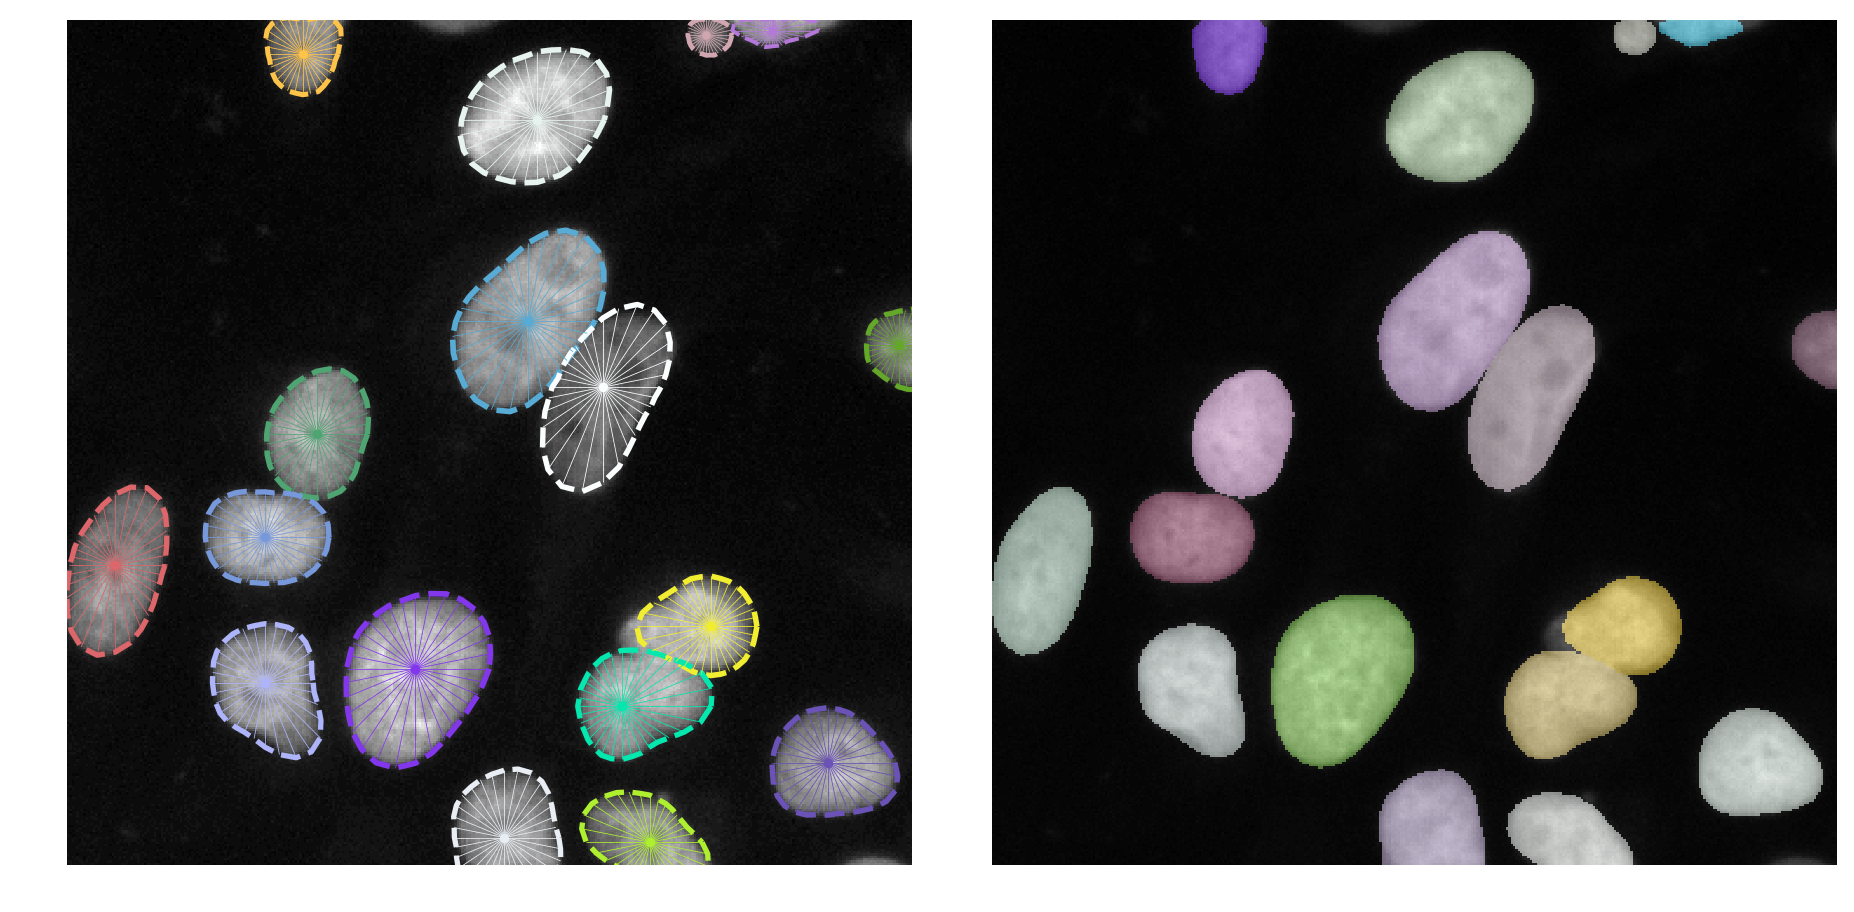

In [9]:
example(model, 42)

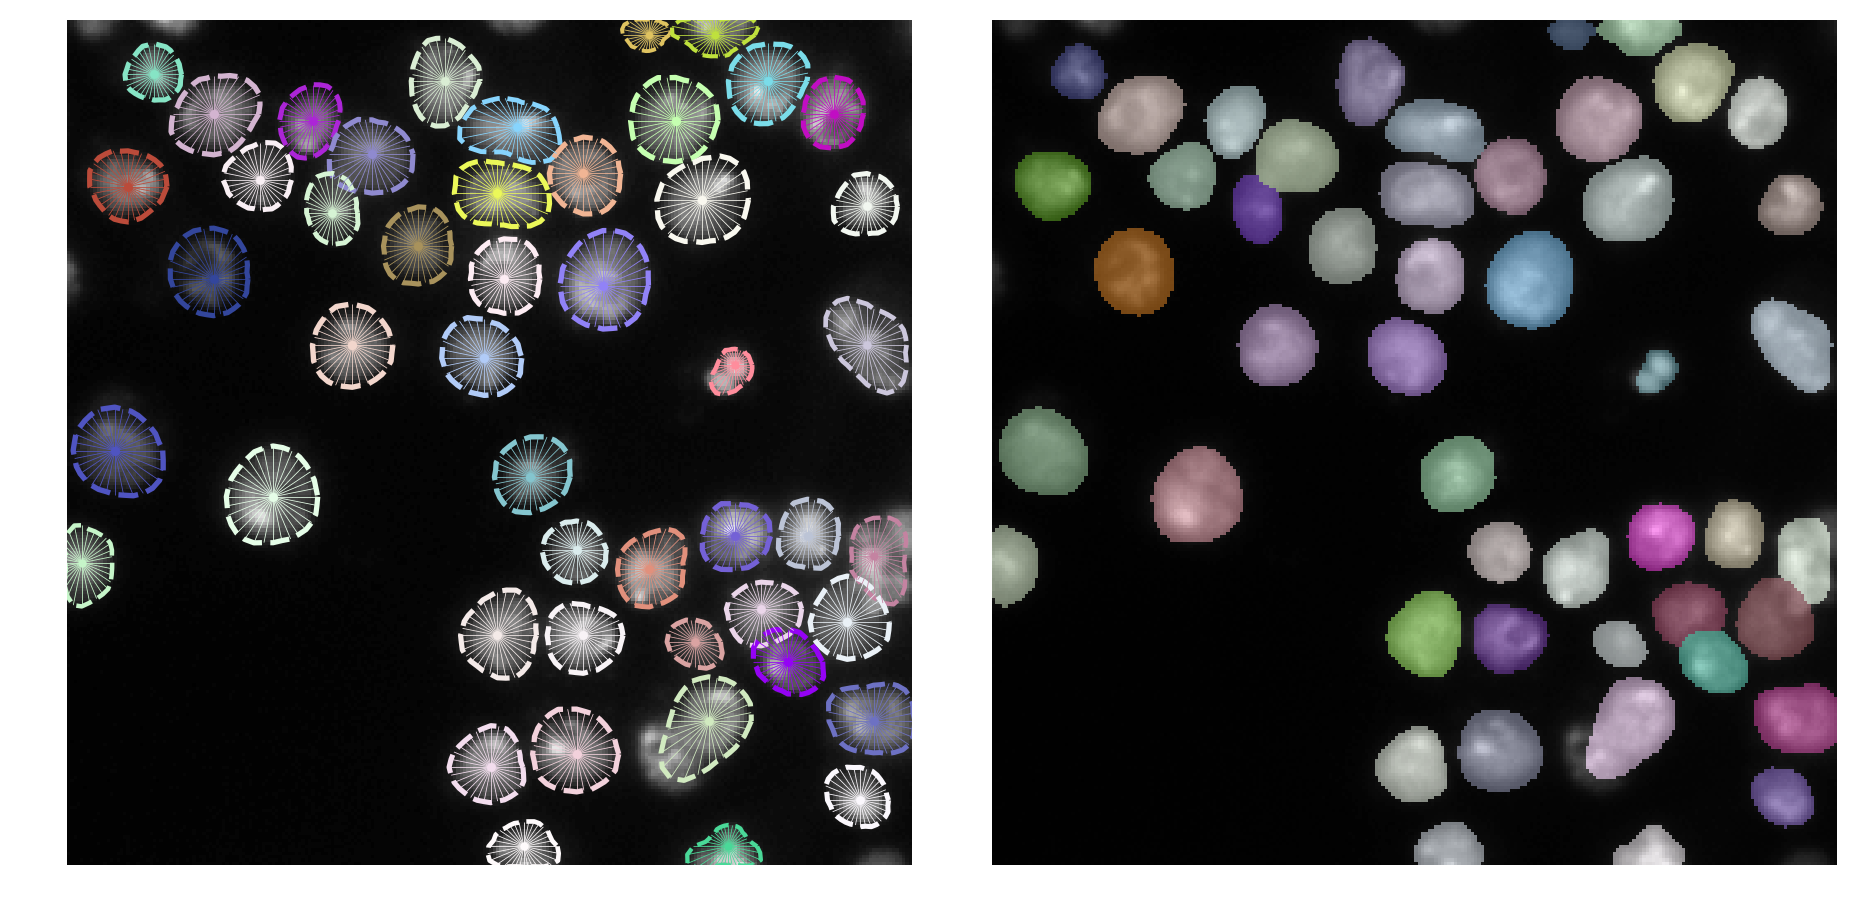

In [10]:
example(model, 1)

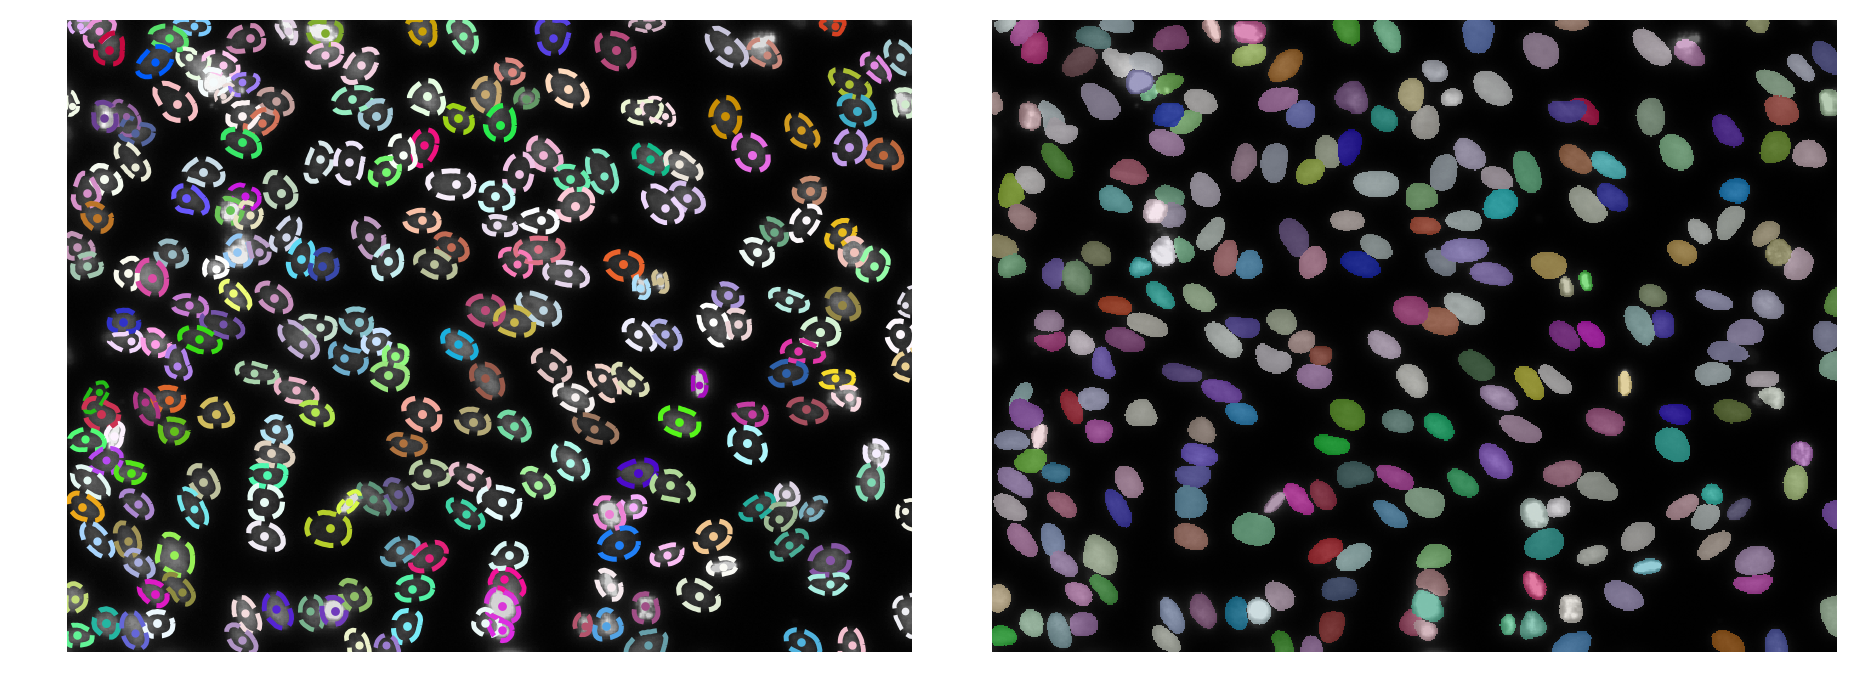

In [11]:
example(model, 15, False)

# Model from paper

In [12]:
model_paper = StarDist2D.from_pretrained('2D_paper_dsb2018')

Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


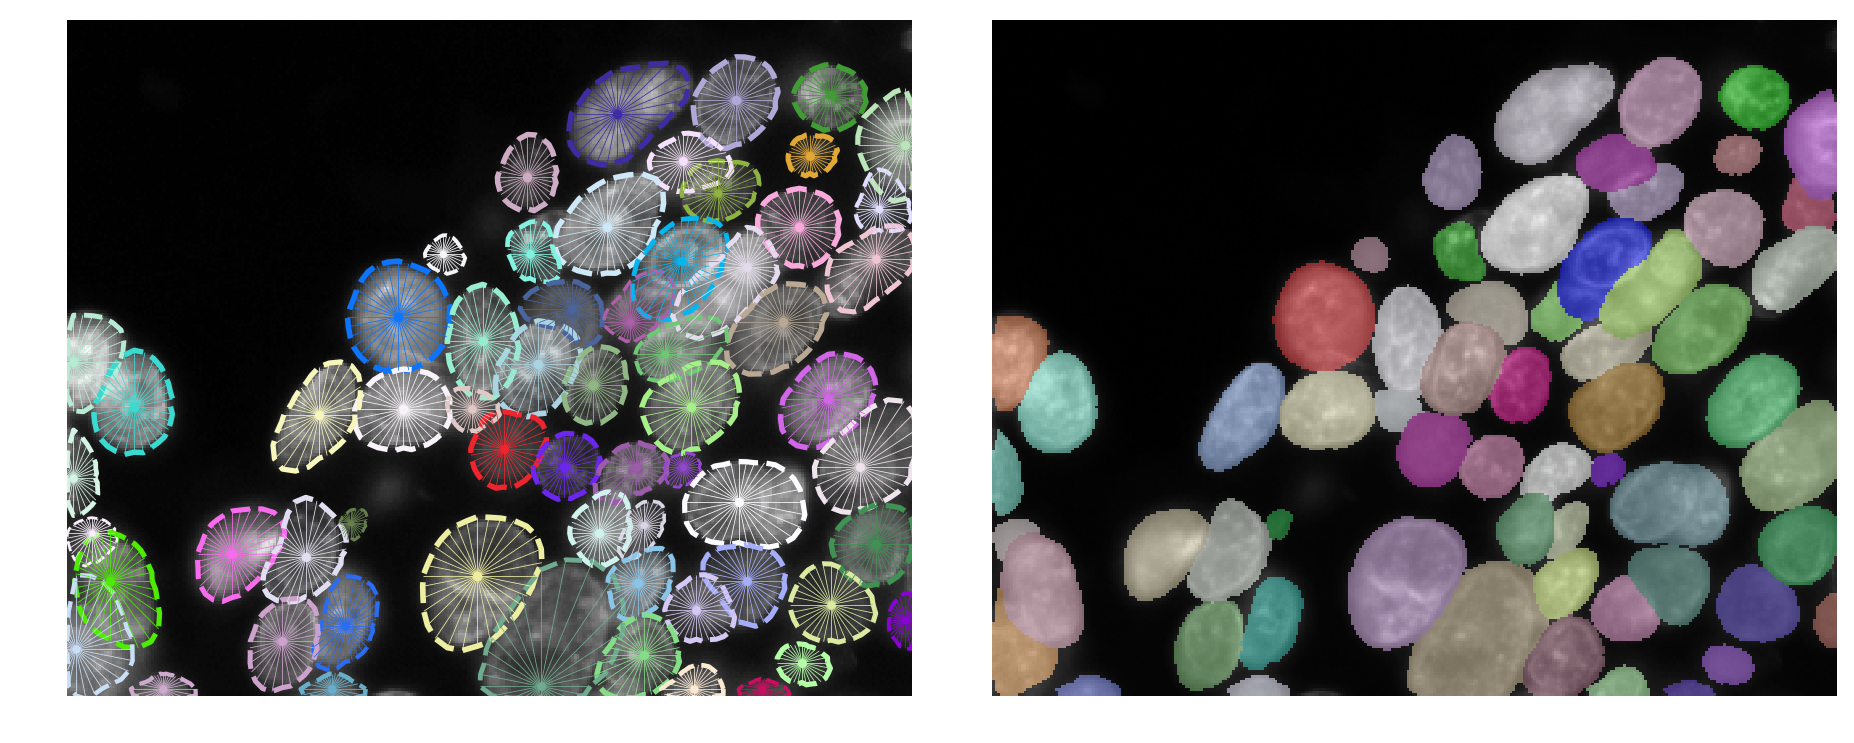

In [13]:
example(model_paper, 29)

# Versatile model

Try this model first if you have images that look similar to the training data in this example.

In [14]:
model_versatile = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


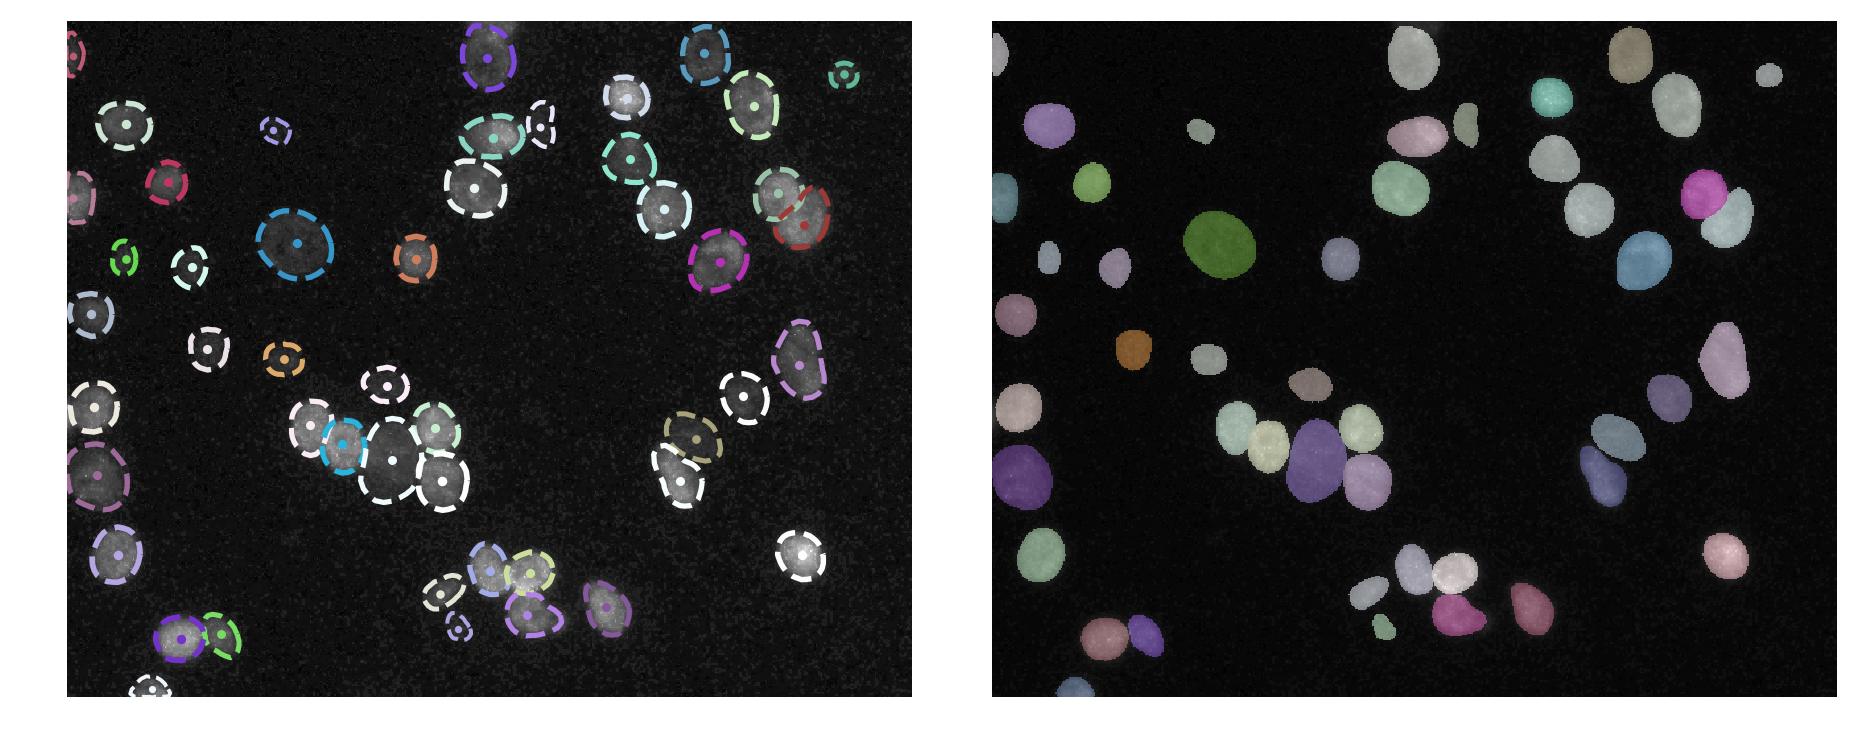

In [15]:
example(model_versatile, 30, False)

Show all available pretrained models:

In [16]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
